In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import tellurium as te
from roadrunner import Config
import pandas as pd
import test_dict

plt.style.use('seaborn-darkgrid')
from matplotlib import rc,rcParams

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

rc('font', weight='bold')
rcParams['axes.labelsize'] = BIGGER_SIZE
rcParams['xtick.labelsize'] = MEDIUM_SIZE
rcParams['ytick.labelsize'] = MEDIUM_SIZE
rcParams['legend.fontsize'] = MEDIUM_SIZE
rcParams['text.usetex'] = False

In [5]:
options = {1: "cPL_conc",
           2: "noV_cPL_conc",
           3: "pc_pe_PL",
           4: "PLModel",
           5: "SS_PLModel_ConKin",
           6: "SS_PLModel_E_MA",
           7: "SS_PLModel_MA",
           8: "SS_PLModel_MM"
           }
name = options[7]
modelpath = "/home/nexia/PhD/malaria_lipid_models/model_files/" + name + ".atm"
datapath = "~/PhD/malaria_lipid_models/CMA_files/"+name+"/"
Alex_to_amount = 1e-18*6.02214086e23
Alex_to_amount=1

In [4]:
model = te.loada(modelpath)
scatter_dic = test_dict.mke_test_dict(model, timepoints=['troph'])
scatter_dic

{'Phosphatidylcholine_mem': {'values': [[25268.41448189764,
    27801.87265917603,
    32662.92134831461]],
  'std': [[3757.8126725459665, 3757.8126725459665, 3757.8126725459665]]},
 'Phosphatidylethanolamine_mem': {'values': [[11422.72159800251,
    13002.247191011238,
    17082.771535580527]],
  'std': [[2920.666171768269, 2920.666171768269, 2920.666171768269]]},
 'Phosphatidylserine_mem': {'values': [[3022.2222222222213,
    5416.85393258427,
    4652.434456928839]],
  'std': [[1223.1237395306018, 1223.1237395306018, 1223.1237395306018]]},
 'Ethanolamine': {'values': [[314.69392059549307]],
  'std': [[39.305643837223634]]},
 'Ethanolamine_phosphate': {'values': [[10075.180857009856]],
  'std': [[945.3256112749988]]},
 'CDP_choline': {'values': [[752.5289405544399]],
  'std': [[55.10253234142428]]},
 'CDP_ethanolamine': {'values': [[1200.3147564215446]],
  'std': [[104.48335703565778]]},
 'Choline_phosphate': {'values': [[11567.80024323354]],
  'std': [[611.35202360745]]},
 'L_Serine

In [3]:
1/Alex_to_amount


1.6605390395999472e-06

### Create parameter set to_fit.txt, given to CMA-ES as starting point 

In [4]:
pc_test = te.loada(modelpath)
pc_test.getGlobalParameterIds()
a = pc_test.getGlobalParameterIds()
b = np.random.rand(len(a))

dic = dict(zip(a,b))
# values that are not be fit
# enzymes concentration are assigned, thus no setting possible 
dic = {i:dic[i] for i in dic if not i.startswith('E')}  
# volume growth is set from experimental findings

dic.keys()

dict_keys(['cmax_ECholine_in', 'cmin_ECholine_in', 't12_ECholine_in', 's_ECholine_in', 'cmax_E2_7_1_32', 'cmin_E2_7_1_32', 't12_E2_7_1_32', 's_E2_7_1_32', 'cmax_E2_7_7_15', 'cmin_E2_7_7_15', 't12_E2_7_7_15', 's_E2_7_7_15', 'cmax_E2_7_8_2', 'cmin_E2_7_8_2', 't12_E2_7_8_2', 's_E2_7_8_2', 'cmax_EPC_mem', 'cmin_EPC_mem', 't12_EPC_mem', 's_EPC_mem', 'k_Choline_in', 'k_R01021', 'k_R01890', 'k_R01321', 'k_TransportPC', 't'])

In [68]:

def calculate_alex():
    
    alex_data = np.array([133.0, 208.0, 763.0, 1709.0])
    alex1 = np.array([107.29, 227.37, 674.67, 1511.67])
    alex2 = np.array([117.19, 199.33, 742.31, 2448.40])
    alex3 = np.array([175.31, 198.61, 872.10, 1168.42])
    alex = np.dstack((alex_data,alex1,alex2,alex3))
    
    y_alex = np.mean(alex[0], axis=1)
    y_er = np.std(alex[0], axis=1)
    
    return y_alex, y_er
    


<ErrorbarContainer object of 3 artists>

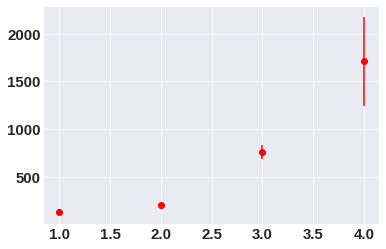

In [67]:
plt.errorbar(x=[1,2,3,4], y=y_alex, yerr=y_er, fmt='ro')

In [4]:
def simple_plot(names, ncol):

    subfigs=len(names)
    if subfigs %ncol >= 1:
        rows=int(np.ceil(subfigs/ncol))
    else:
        rows=int(subfigs/ncol)
    #print(rows.type)
    x_width = 5*ncol 
    fig, axes = plt.subplots(nrows=rows, ncols=ncol, figsize=(x_width, 5*rows))
    fig.subplots_adjust(hspace = .5, wspace=.15)
    
    nx, ny = (rows, ncol)
    x = np.linspace(0, rows-1, nx)
    y = np.linspace(0, ncol-1, ny)

    xv, yv = np.meshgrid(x, y)
    coor_list = np.column_stack((xv.ravel(),yv.ravel()))

    for axnum, file in enumerate(names):
        if ncol == 1:
            cor=(int(coor_list[axnum][0]))
        else:
            cor=(int(coor_list[axnum][0]),int(coor_list[axnum][1]))

        filename = file
        path= datapath
        with open(path+filename, 'rb') as g:
            data = pickle.loads(g.read())
         
        try:
            axes[cor].plot(data['time']/3600, data['Phosphatidylcholine_mem']*Alex_to_amount)
        except:
            axes[cor].plot(data['time']/3600, data['[Phosphatidylcholine_mem]']*Alex_to_amount)
        
        y_alex, y_er = calculate_alex() 
        
        axes[cor].errorbar([0, 8,129600/3600,172800/3600], y=y_alex*Alex_to_amount, yerr=y_er*Alex_to_amount, fmt='ro',label='PC')
        axes[cor].legend(loc='upper left')
        axes[cor].set_xlabel('time in [h]')
        axes[cor].set_ylabel('Amount',fontsize=BIGGER_SIZE,fontweight='bold')
        
        axes[cor].set_title(file)
        
    for i in range(ncol*rows):
         if axes.flat[i].has_data() == False:
            axes.flat[i].set_visible(False) # to remove plot if no data
    fig.tight_layout()
    return

def compute_sqd_distance(simulation_result_dict, data, factor=10**1,
                         normalized=True):

    # list of intersecting keys, as only those relevant
    inter = simulation_result_dict.keys() & data.keys()

    dist_ar = np.zeros(len(inter))

    alex_bias_lst = ['DAG', 'Phosphatidylserine_mem',
                     'Phosphatidylethanolamine_mem', 'Phosphatidylcholine_mem']

    for ar_pos, molecule in enumerate(inter):
        if molecule == 'time':
            continue
        dist = 0.

        bias_fac = 1
        if molecule in alex_bias_lst:
            bias_fac = 2
        # iterate through the measured timepoints, thus finer evaluation of fit
        for i, values in enumerate(data[molecule]['values']):
            for pos, value in enumerate(values):
                # data entries empty as no literature value found, thus skipped
                if np.isnan(value):
                    continue
                if normalized:
                    dist += np.nansum(((value
                            - simulation_result_dict[molecule][i])**2  # noqa: E128
                            * bias_fac)  # noqa:E128
                            / data[molecule]['std'][i][pos]**2)   # noqa: E128

                else:
                    dist += np.nansum(bias_fac*(value
                            - simulation_result_dict[molecule][i])**2)  # noqa:E128
        dist_ar[ar_pos] = dist * factor

    return dist_ar


def plot_results_df(model_res, esti:str, t_data):
    rows = 6
    ncol= 2
    nx, ny = (rows, ncol)
    x = np.linspace(0, rows-1, nx)
    y = np.linspace(0, ncol-1, ny)

    xv, yv = np.meshgrid(x, y)
    coor_list = np.column_stack((xv.ravel(),yv.ravel()))
    coor_list = [x for x in coor_list if x[0] != 0]


    res = model_res
    res_dic = simulation_to_dict(res)
    # floating species have to be divided by volume to be in M
    fig = plt.figure(figsize=(15,24))

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

    #ax1.set_title(esti)
    ax1.plot(res['time']/3600,res.iloc[:,1:])
    sqd_ar = compute_sqd_distance(res_dic, t_data)
    
    print(f'Value script function: {sqr_ar.sum()}')
    
    for it,col in enumerate(res.columns):
        plt.style.use('seaborn')
        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)

        if col == 'Phosphatidylcholine_mem':
            color = 'r'
            alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
            alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
            alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
            alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount

            ax2.scatter([0, 8,129600/3600,172800/3600], alex_data, 
                        color='red',linestyle='--', label='PC')

            ax2.scatter([0, 8,129600/3600,172800/3600], alex1, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([0, 8,129600/3600,172800/3600], alex2, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([0, 8,129600/3600,172800/3600], alex3, 
                        color='red',linestyle='--', label='PC')
        elif col in scatter_dic:
                scatter_amount = np.asarray(t_data[col]['mean']) * Alex_to_amount
                ax2.scatter([0,8,129600/3600,172800/3600], scatter_amount,
                           color='red',linestyle='--')

        ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)

        ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
        ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')
    
    
    
    
    ax1.set_title(esti)
    plt.tight_layout()   
    #plt.savefig(esti+'.png', format="png")
    plt.show()
    plt.close()
    
    return


In [5]:
def simulation_to_dict(simulation_result_p):

    s_panda = simulation_result_p

    u_time = 2 * 3600
    ring_time = 8 * 3600
    troph_time = 36 * 3600
    schiz_time = 48 * 3600

    measure_points = [u_time, ring_time, troph_time, schiz_time]
    # find most similar timepoint in simulation_results
    can = []
    for item in measure_points:
        can.append(min(s_panda['time'], key=lambda x: abs(x - item)))

    # get index of those points
    inex = []
    for i, item in enumerate(s_panda['time']):
        if item in can:
            inex.append(i)
    # dict with molecule names as keys and value is list of values at the specified timepoints
    return s_panda.iloc[inex].drop('time', axis=1).to_dict('list')


def set_model_parameters(model, params, excluded_values=[]):
    no_names = excluded_values
    for param_id in params: 
        if any(x in param_id for x in no_names):
            continue
        else:
            try:
                model[param_id] = params[param_id]
                # print(model[param_id])
            except RuntimeError:
                print('could not set parameter : {0}'.format(param_id))
                continue
            except TypeError:
                #print('try to set {0} to {1}'.format(model[param_id]),params[param_id])
                print(format(model[param_id]))  # 
                print(format(params[param_id]))
    return model


def simulation_to_panda(simulation_result):
    #print(simulation_result.colnames)
    return pd.DataFrame(simulation_result, columns=simulation_result.colnames)


In [8]:
files = os.listdir()

files = [file for file in files if file.endswith('dataplot.txt')]
#files = [file for file in files if file.startswith('2020')]
files= sorted(files)
print(files)
for file in files:
    
    filename = file
    path = datapath
    
    with open(path+filename, 'rb') as g:
        data = pickle.loads(g.read())
    plot_results_df(data, 'test', scatter_dic)   


#path= '20201118-16:14:51dataplot.txt'
#with open(path, 'rb') as g:
    #data1 = pickle.loads(g.read())


['20210616-12:31:40dataplot.txt', '20210618-09:43:03dataplot.txt', '20210623-15:23:43dataplot.txt', '20210714-16:43:08dataplot.txt', '20210714-17:19:17dataplot.txt']


FileNotFoundError: [Errno 2] No such file or directory: '/home/nexia/PhD/Parameter_Sampler/CMA_files/cPL_conc/20210616-12:31:40dataplot.txt'

In [7]:
n = 4
subfigs=len(files)
if subfigs %n >= 1:
    r=int(np.ceil(subfigs/n))
else:
    r=int(subfigs/n)

nx, ny = (r, n)
print(subfigs%n)
x = np.linspace(0, r-1, nx)

y = np.linspace(0, n-1, ny)
xv, yv = np.meshgrid(x, y)
out = np.column_stack((yv.ravel(),xv.ravel()))
len(out)

2


4

In [26]:
files = os.listdir(datapath)
files = [file for file in files if file.endswith('paras.txt')]
#files = [file for file in files if file.startswith('2020')]
files= sorted(files)
#files

In [19]:
print(files)

['20210713-11:35:131whole_paras.txt', '20210715-10:02:401whole_paras.txt', '20210715-12:48:571whole_paras.txt']


In [20]:
df = pd.DataFrame()
for file in files:
    filename = file
    path = datapath
    print(path + filename)
    with open(path+filename, 'rb') as g:
        data = pickle.loads(g.read())
    dnew = pd.DataFrame.from_dict(data[1], orient='index',columns=['Value'])
    #print(file)
    #print(np.log10(dnew['Value']))
    df[str(data[0])] = dnew['Value']


/home/nexia/PhD/Parameter_Sampler/CMA_files/cPL_conc/20210713-11:35:131whole_paras.txt
/home/nexia/PhD/Parameter_Sampler/CMA_files/cPL_conc/20210715-10:02:401whole_paras.txt
/home/nexia/PhD/Parameter_Sampler/CMA_files/cPL_conc/20210715-12:48:571whole_paras.txt


In [10]:
print(data[1])
#best set 20210502-10:47:42cmawhole_paras.txt

{'cmax_ECholine_in': 0.5548876102963041, 'cmin_ECholine_in': 0.0196375243039834, 't12_ECholine_in': 8251.243015302227, 's_ECholine_in': 1751.825116508778, 'cmax_E2_7_1_32': 8236.310820668714, 'cmin_E2_7_1_32': 9498.725497617592, 't12_E2_7_1_32': 11710.845495009917, 's_E2_7_1_32': 2921.5006190075123, 'cmax_E2_7_7_15': 0.03930636945777464, 'cmin_E2_7_7_15': 838.9560560775792, 't12_E2_7_7_15': 4055.26605603331, 's_E2_7_7_15': 142.15292899231864, 'cmax_E2_7_8_2': 0.1346428189696642, 'cmin_E2_7_8_2': 0.35200728920992336, 't12_E2_7_8_2': 7293.00097925492, 's_E2_7_8_2': 90.4647380533517, 'cmax_EPC_mem': 3352.7180135422113, 'cmin_EPC_mem': 4126.050420037696, 't12_EPC_mem': 6016.598867504951, 's_EPC_mem': 3897.2723758782327, 'k_Choline_in': 0.009774997256559684, 'k_R01021': 15554.2400140754, 'k_R01890': 0.0005971029948834765, 'k_R01321': 0.0026738880453307285, 'k_TransportPC': 8608.284768806981}


In [11]:
def log_trans(param_vec, direction):

    assert direction in [-1, 1]

    if direction == 1:
        param_vec = np.log10(param_vec)
    else:
        param_vec.astype(np.float128)
        param_vec = 10**(param_vec)
        param_vec.astype('double')

    return param_vec

In [12]:
results = list(map(float, df.columns.to_list()))
sorted(results)
log_trans(df[str(min(results))],-1)


cmax_ECholine_in    1.002073e+00
cmin_ECholine_in    1.000079e+00
t12_ECholine_in              inf
s_ECholine_in                inf
cmax_E2_7_1_32      2.650131e+00
cmin_E2_7_1_32      1.011353e+00
t12_E2_7_1_32                inf
s_E2_7_1_32                  inf
cmax_E2_7_7_15               inf
cmin_E2_7_7_15               inf
t12_E2_7_7_15                inf
s_E2_7_7_15                  inf
cmax_E2_7_8_2                inf
cmin_E2_7_8_2                inf
t12_E2_7_8_2                 inf
s_E2_7_8_2                   inf
cmax_EPC_mem        1.000707e+00
cmin_EPC_mem        4.527991e+00
t12_EPC_mem         4.714876e+65
s_EPC_mem                    inf
k_Choline_in                 inf
k_R01021            1.000003e+00
k_R01890                     inf
k_R01321                     inf
k_TransportPC       1.000526e+00
Name: 1.469204748101735e-10, dtype: float64

In [14]:
rows = 4
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
[x for x in coor_list if x[0] != 0]

[array([1., 0.]),
 array([2., 0.]),
 array([3., 0.]),
 array([1., 1.]),
 array([2., 1.]),
 array([3., 1.])]

In [21]:
results = list(map(float, df.columns.to_list()))
sorted(results)

[3945141597.756128, 2722049758310.275, 4.325583774585048e+26]

Choline 0 9.01832722198779
Choline 2 136.0584411257507
return 1450767683.477385
Choline_phosphate 0 17.39311176662356
Choline_phosphate 2 5844.151532853143
return 58615446446.19766
CDP_choline 0 1451042822293.8923
CDP_choline 2 1534464516102434.8
return 1.5359155589247287e+22
Phosphatidylcholine 2 127.98142260110149
return 1279814226.011015
Phosphatidylcholine_mem 0 419836161189.00684
Phosphatidylcholine_mem 1 940661384669.0616
Phosphatidylcholine_mem 2 153706049521.34256
Phosphatidylcholine_mem 3 23261802652.998234
return 1.5374653980324092e+19
Phosphatidylcholine_mem 70346630994.38445
Phosphatidylcholine 0.9954024707104511
Choline_phosphate 372.5369806037035
Choline 11.4662990004482
CDP_choline 7978200812586280.0
Value script function: 7.978271159217658e+22
Score estimation: 4.325583774585048e+26
New_Score/estimation_Score: 3.554324929185733e-05
Value single function: 1.5374530243288956e+22


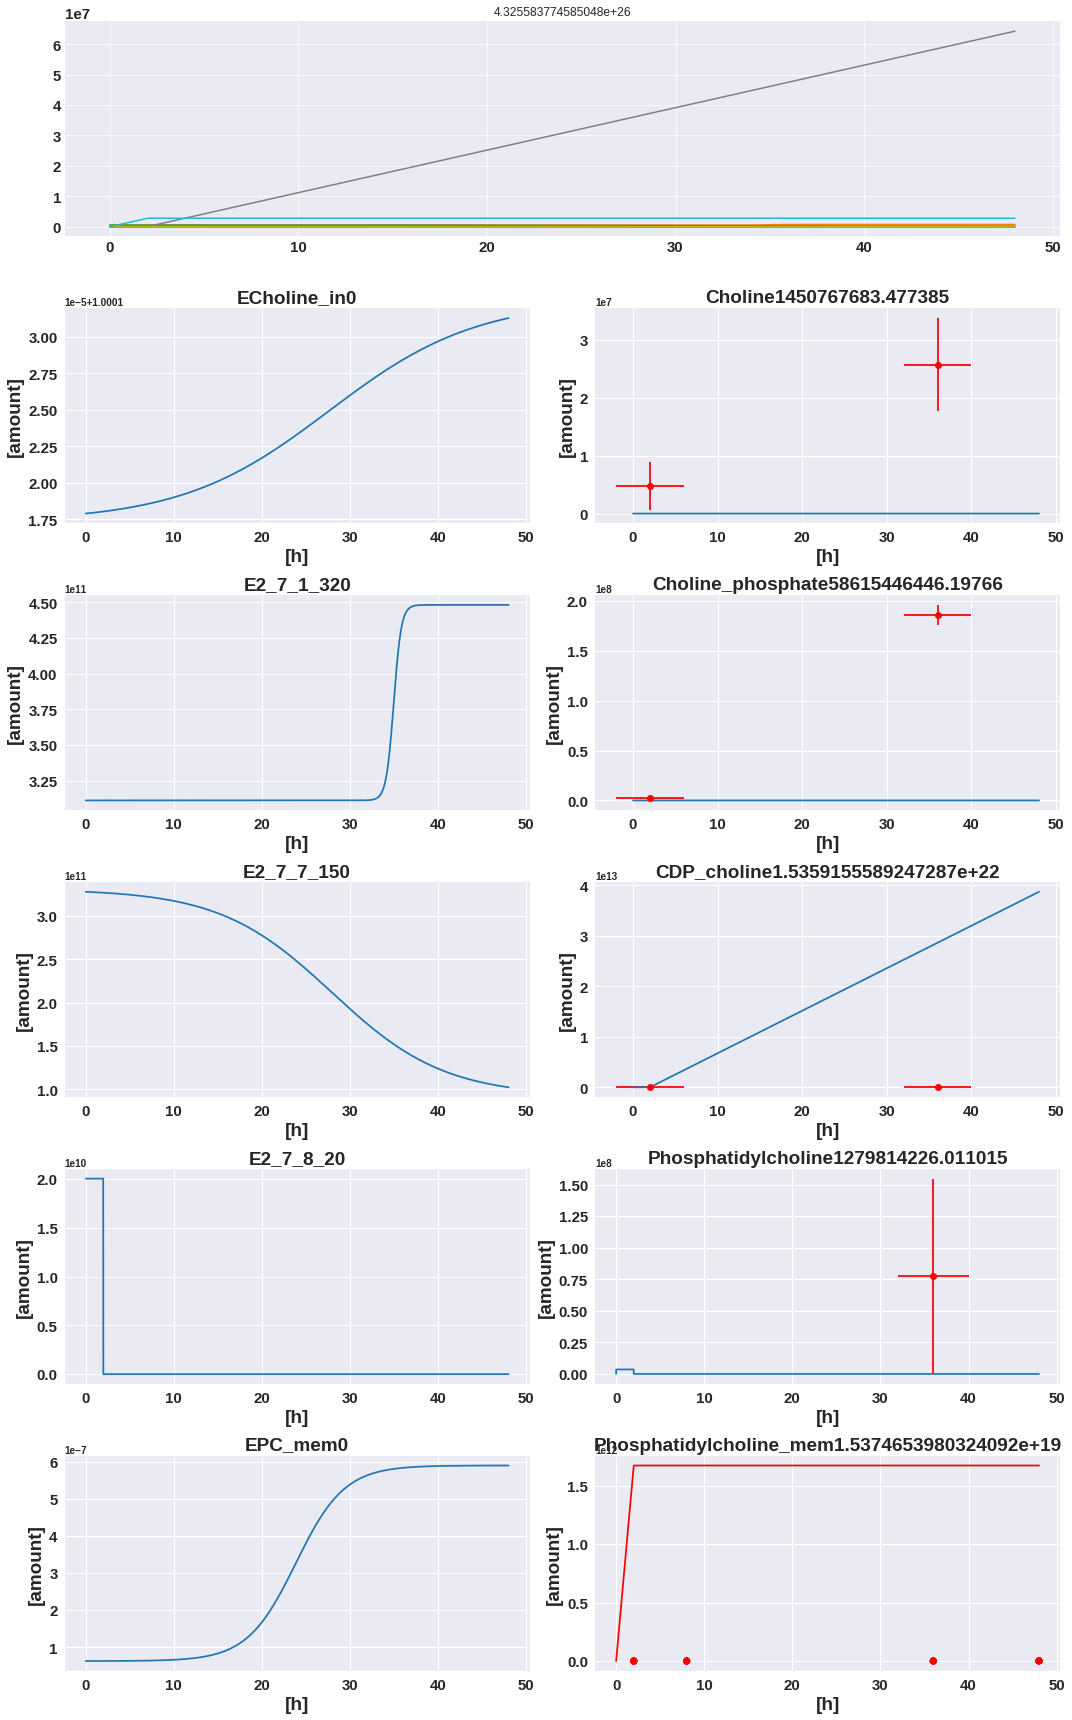

Choline 0 9.01832722198779
Choline 2 136.05844112574843
return 1450767683.4773622
Choline_phosphate 0 17.393111766623566
Choline_phosphate 2 5844.151532853143
return 58615446446.19766
CDP_choline 0 147.62802584176197
CDP_choline 2 1.3600163124342983
return 1489880421.5419629
Phosphatidylcholine 2 5.437325025683569
return 54373250.256835684
Phosphatidylcholine_mem 0 966.49598820259
Phosphatidylcholine_mem 1 5297.615747771499
Phosphatidylcholine_mem 2 11599.242869717009
Phosphatidylcholine_mem 3 8817.169314294444
return 266805239199.85544
Phosphatidylcholine_mem 478.2271514328291
Phosphatidylcholine 0.04228994063842051
Choline_phosphate 372.5369806037035
Choline 11.466299000448032
CDP_choline 705585.6480060783
Value script function: 7064479207270.56
Score estimation: 3945141597.756128
New_Score/estimation_Score: 83.24560699877586
Value single function: 328415707001.3293


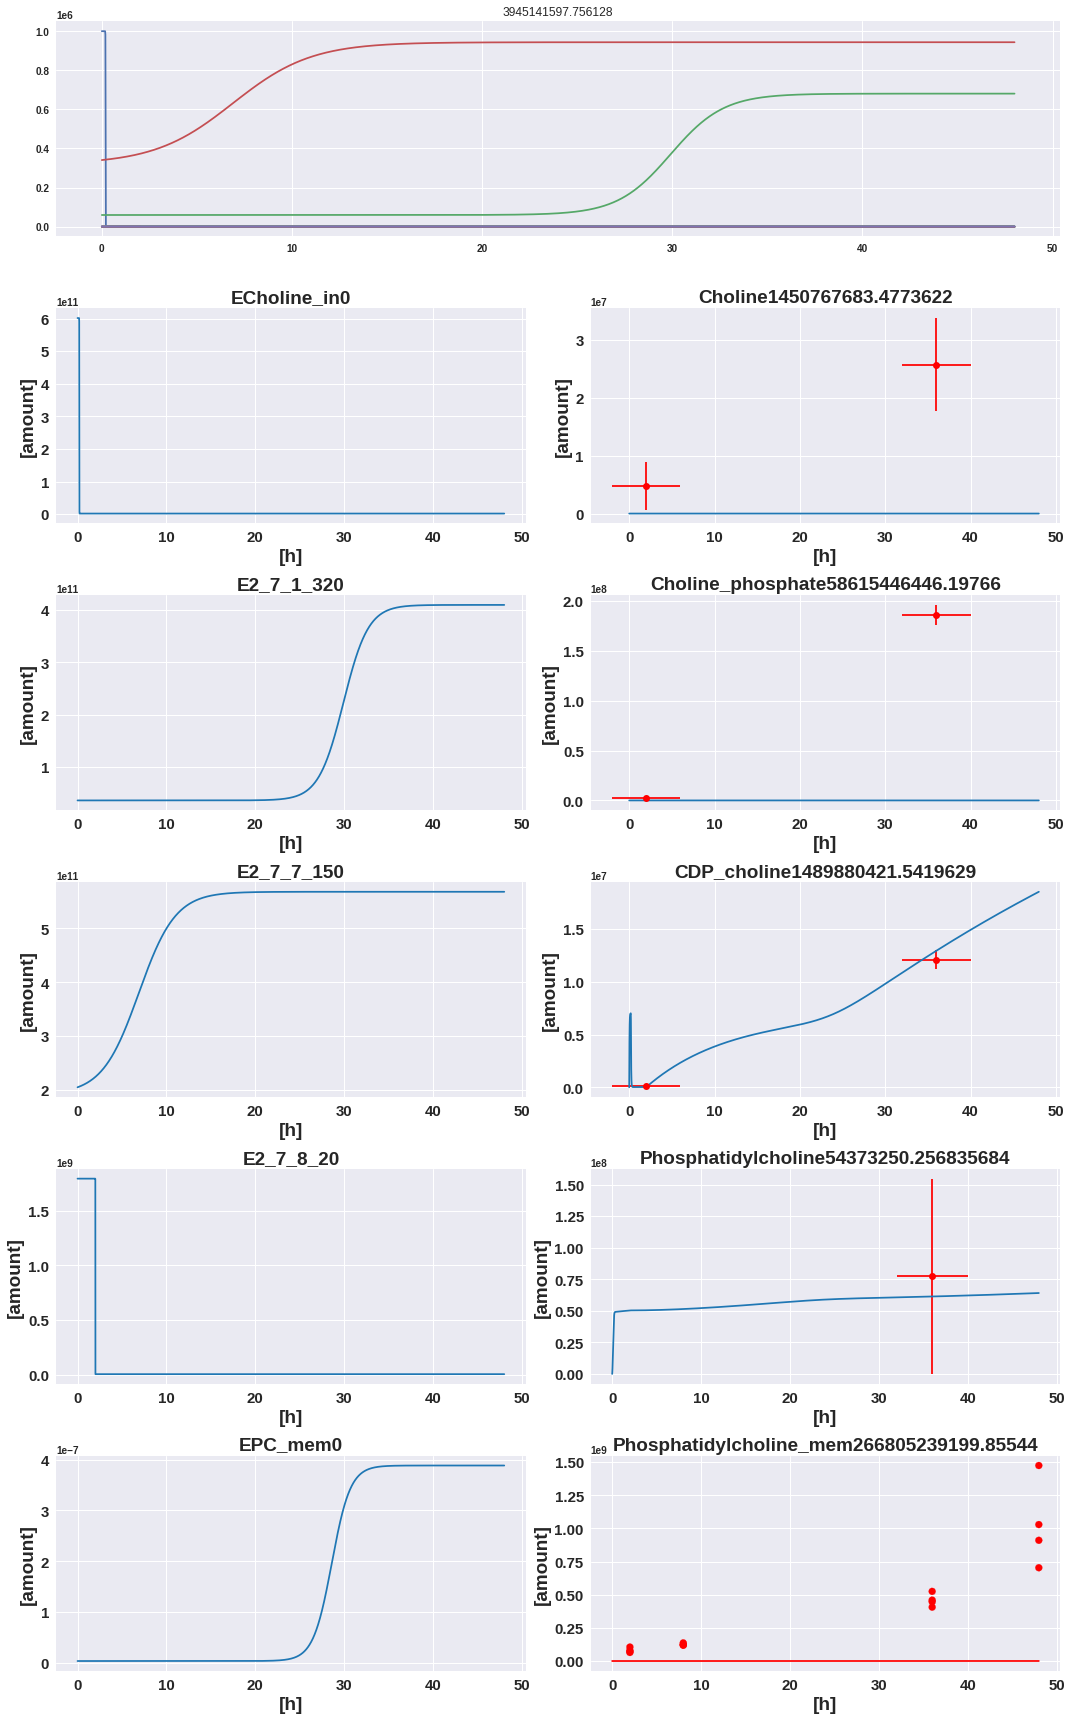

Choline 0 9.01832722198779
Choline 2 136.0584411257507
return 1450767683.477385
Choline_phosphate 0 17.248149705128462
Choline_phosphate 2 5837.768054474308
return 58550162041.794365
CDP_choline 0 209.2279222306475
CDP_choline 2 274.4012695259013
return 4836291917.565488
Phosphatidylcholine 2 127.07523992370216
return 1270752399.2370214
Phosphatidylcholine_mem 0 966.3675352706257
Phosphatidylcholine_mem 1 5290.744535435432
Phosphatidylcholine_mem 2 11578.666936197042
Phosphatidylcholine_mem 3 8810.663120447929
return 266464421273.5103
Phosphatidylcholine_mem 477.58980194690616
Phosphatidylcholine 0.9883544440698211
Choline_phosphate 372.02499873021156
Choline 11.4662990004482
CDP_choline 1000186.5093896457
Value script function: 10010485788437.674
Score estimation: 2722049758310.275
New_Score/estimation_Score: 0.12217719176523446
Value single function: 332572395315.5846


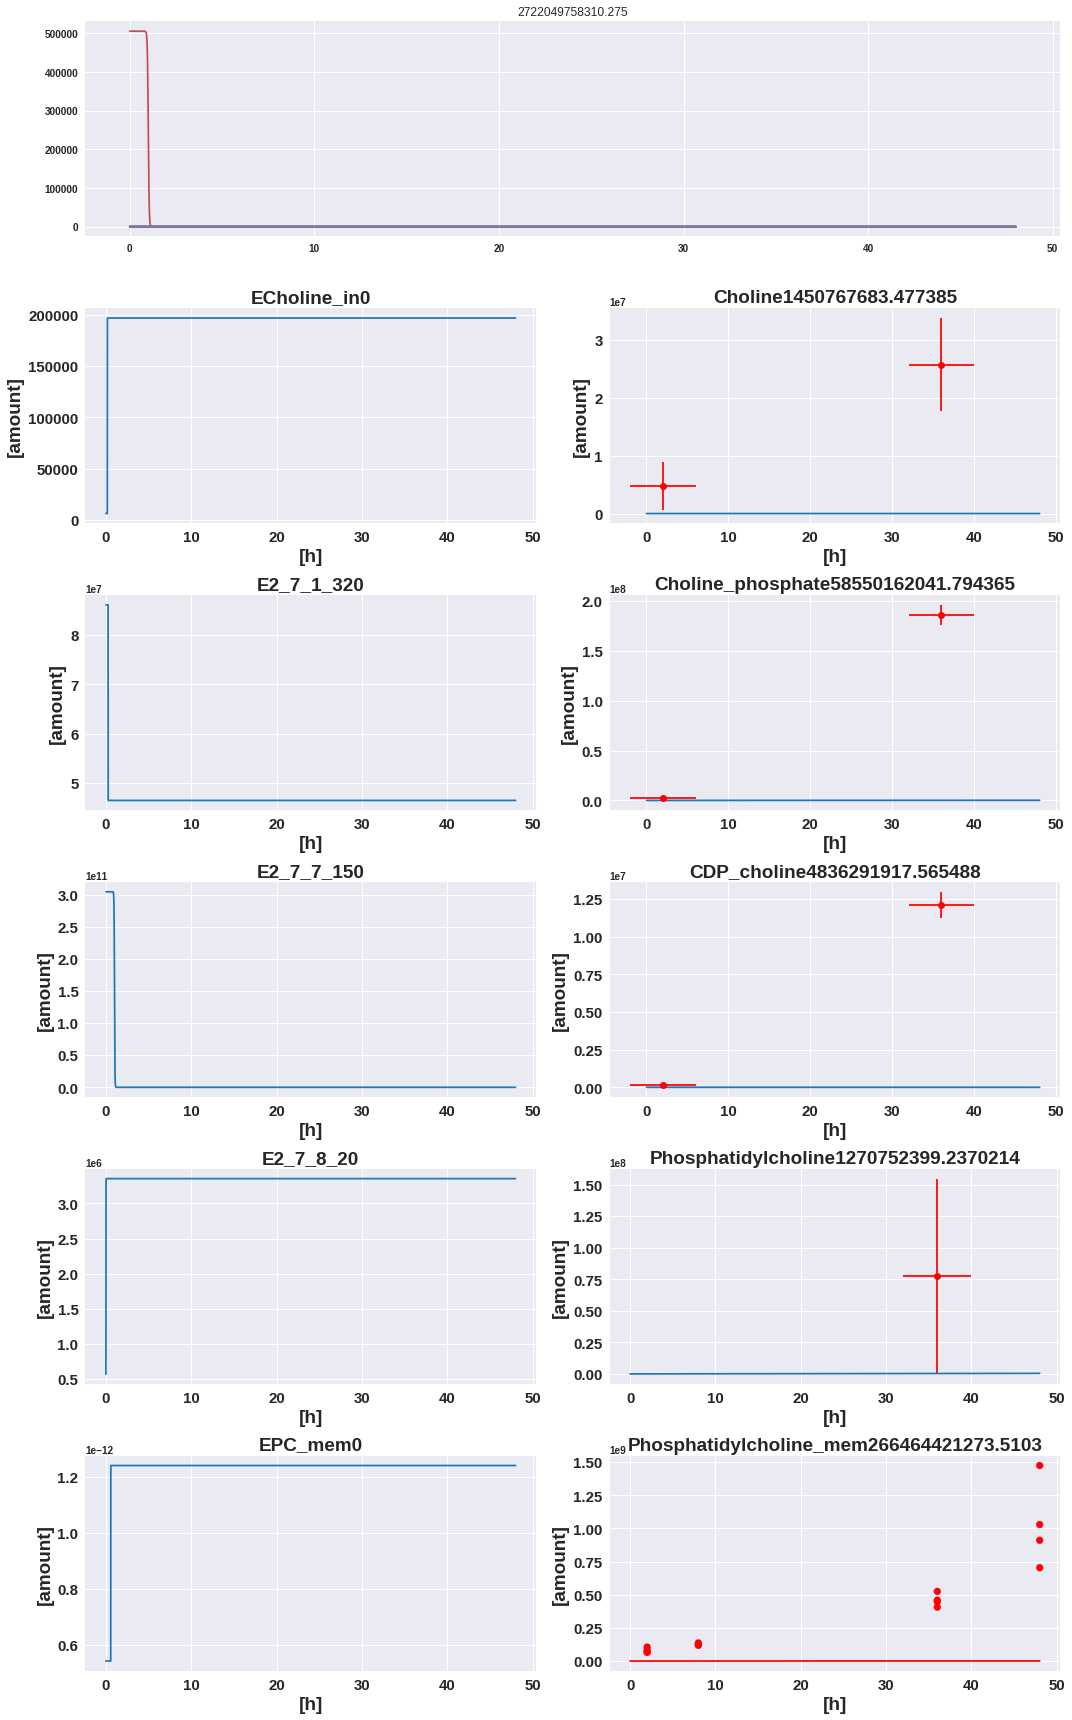

In [22]:
rows = 6
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
coor_list = [x for x in coor_list if x[0] != 0]


results = list(map(float, df.columns.to_list()))
model = te.loada(modelpath)
i = 0
for esti in results[:]:
    if i == len(results):
        break
    i+=1
    model.resetToOrigin()
    model = set_model_parameters(model, df[str(esti)].to_dict())
    
    enzymes = [x for x in model.getGlobalParameterIds() if x.startswith('E')]
    selections = enzymes + model.getFloatingSpeciesIds()
    # how selctions is used here floating species in mol
    model.selections = ['time']+selections

    #model.selections = ['time']+selections
    try:
        model_res = model.simulate(0, 48 * 3600, 3600)
    
    except:
        print(esti,' not working')
        continue
        
    res = simulation_to_panda(model_res)
    res_dic = simulation_to_dict(res)
    # floating species have to be divided by volume to be in M
    fig = plt.figure(figsize=(15,24))

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

    ax1.set_title(esti)
    ax1.plot(res['time']/3600,res.iloc[:,1:])

    summe = 0
    for it,col in enumerate(selections):
        plt.style.use('seaborn')
        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)
        
        sqd_dis = 0
        if col in scatter_dic:
            sqd_dis = compute_sqd_distance_single(col, res_dic, scatter_dic)
            summe += sqd_dis
        if col == 'Phosphatidylcholine_mem':
            color = 'r'
            alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
            alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
            alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
            alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount
            
            ax2.scatter([2, 8,129600/3600,172800/3600], alex_data, 
                        color='red',linestyle='--', label='PC')
        
            ax2.scatter([2, 8,129600/3600,172800/3600], alex1, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([2, 8,129600/3600,172800/3600], alex2, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([2, 8,129600/3600,172800/3600], alex3, 
                        color='red',linestyle='--', label='PC')
        elif col in scatter_dic:
                scatter_amount = np.asarray(scatter_dic[col]['mean']) * Alex_to_amount
                scatter_std = np.asarray(scatter_dic[col]['std']) * Alex_to_amount
                ax2.errorbar(x=[2,8,129600/3600,172800/3600], y=scatter_amount,
                             xerr=4,
                             yerr= scatter_std, fmt='o', color='red')
            
        ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)
        
        ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
        ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')
   
    
    print(f'Value script function: {compute_sqd_distance(res_dic, scatter_dic)}')
    print(f'Score estimation: {esti}')
    print('New_Score/estimation_Score:',summe/esti)
    print(f'Value single function: {summe}')
    plt.tight_layout()   
    #plt.savefig(esti+'.png', format="png")
    plt.show()
    plt.close()

In [ ]:
rows = 6
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
coor_list = [x for x in coor_list if x[0] != 0]


results = list(map(float, df.columns.to_list()))
model = te.loada(modelpath)
i = 0
for esti in results[:]:
    if i == len(results):
        break
    i+=1
    model.resetToOrigin()
    model = set_model_parameters(model, df[str(esti)].to_dict())
    
    enzymes = [x for x in model.getGlobalParameterIds() if x.startswith('E')]
    selections = enzymes + model.getFloatingSpeciesIds()
    # how selctions is used here floating species in mol
    model.selections = ['time']+selections

    #model.selections = ['time']+selections
    try:
        model_res = model.simulate(0, 48 * 3600, 3600)
    
    except:
        print(esti,' not working')
        continue
        
    res = simulation_to_panda(model_res)
    res_dic = simulation_to_dict(res)
    # floating species have to be divided by volume to be in M
    fig = plt.figure(figsize=(15,24))

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

    ax1.set_title(esti)
    ax1.plot(res['time']/3600,res.iloc[:,1:])

    summe = 0
    for it,col in enumerate(selections):
        plt.style.use('seaborn')
        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)
        
        sqd_dis = 0
        if col in scatter_dic:
            sqd_dis = compute_sqd_distance_single(col, res_dic, scatter_dic)
            summe += sqd_dis
        if col == 'Phosphatidylcholine_mem':
            color = 'r'
            alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
            alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
            alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
            alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount
            
            ax2.scatter([2, 8,129600/3600,172800/3600], alex_data, 
                        color='red',linestyle='--', label='PC')
        
            ax2.scatter([2, 8,129600/3600,172800/3600], alex1, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([2, 8,129600/3600,172800/3600], alex2, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([2, 8,129600/3600,172800/3600], alex3, 
                        color='red',linestyle='--', label='PC')
        elif col in scatter_dic:
                scatter_amount = np.asarray(scatter_dic[col]['mean']) * Alex_to_amount
                scatter_std = np.asarray(scatter_dic[col]['std']) * Alex_to_amount
                ax2.errorbar(x=[2,8,129600/3600,172800/3600], y=scatter_amount,
                             xerr=4,
                             yerr= scatter_std, fmt='o', color='red')
            
        ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)
        
        ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
        ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')
   
    
    print(f'Value script function: {compute_sqd_distance(res_dic, scatter_dic)}')
    print(f'Score estimation: {esti}')
    print('New_Score/estimation_Score:',summe/esti)
    print(f'Value single function: {summe}')
    plt.tight_layout()   
    #plt.savefig(esti+'.png', format="png")
    plt.show()
    plt.close()

3.0380521770122857

Index(['20004416.9410177', '3.761798568689031e+37', '79502041.01546007',
       '80247227.64283654', '3745480.7123134346', '62090270.35641192',
       '69203851.73454706', '78526680.8648865', '78526602.65312804',
       '57956702.49510242', '69202851.73458979', '61318144.68549356',
       '26901.456696409947', '232781.45294570553', '54429320.92744938',
       '64425744.70099634', '69202851.73438115', '62684193.42958498',
       '13809239.13378565', '15758047.622888193', '16670962.092582453',
       '4000.0000064461988', '4000.0244569241304', '12023319.888443312',
       '18167083.53778422', '4000.0000002797574', '18527460.847893097',
       '18515177.448707327', '4000.0000349692327', '11915803.332435004',
       '18527460.877049394', '6457243.30411441', '10010925.760626273',
       '20004177.234898183', '4000.0000022805734', '62064.934561995375',
       '4242.158986807257', '873719.5781634274', '4000.0000013130725',
       '4000.0001076010326', '18527460.870747212', '15576784.844001407

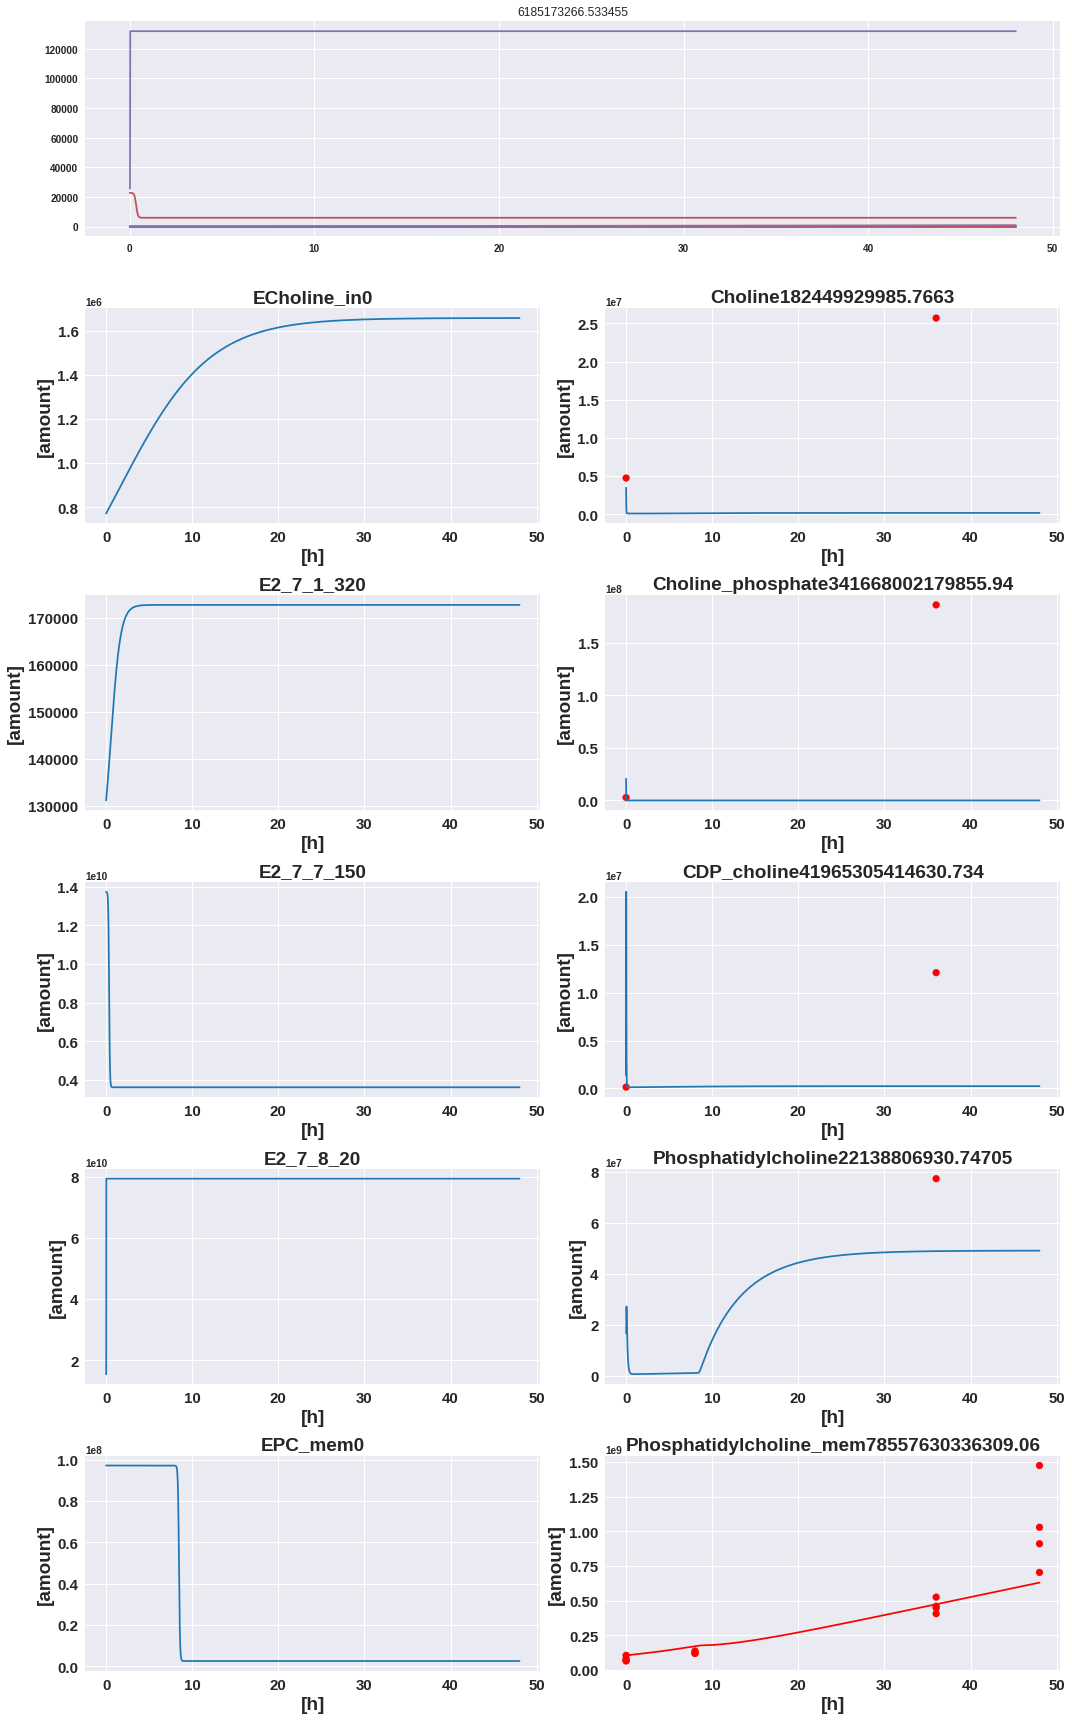

In [29]:
rows = 6
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
coor_list = [x for x in coor_list if x[0] != 0]


results = list(map(float, df.columns.to_list()))
model = te.loada(modelpath)
i = 0
for esti in results[-1:]:
    if i == 5:
        break
    i+=1
    model.resetToOrigin()
    model = set_model_parameters(model, df[str(esti)].to_dict())
    
    enzymes = [x for x in model.getGlobalParameterIds() if x.startswith('E')]
    selections = enzymes + model.getFloatingSpeciesIds()
    # how selctions is used here floating species in mol
    model.selections = ['time']+selections

    #model.selections = ['time']+selections
    try:
        model_res = model.simulate(0, 48 * 3600, 3600)
    
    except:
        print(esti,' not working')
        continue
    res = simulation_to_panda(model_res)
    res_dic = simulation_to_dict(res)
    # floating species have to be divided by volume to be in M
    fig = plt.figure(figsize=(15,24))

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

    ax1.set_title(esti)
    ax1.plot(res['time']/3600,res.iloc[:,1:])


    for it,col in enumerate(selections):
        plt.style.use('seaborn')
        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)
        
        sqd_dis = 0
        if col in scatter_dic:
            sqd_dis = compute_sqd_distance(col, res_dic, scatter_dic)
        
        if col == 'Phosphatidylcholine_mem':
            color = 'r'
            alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
            alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
            alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
            alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount
            
            ax2.scatter([0, 8,129600/3600,172800/3600], alex_data, 
                        color='red',linestyle='--', label='PC')
        
            ax2.scatter([0, 8,129600/3600,172800/3600], alex1, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([0, 8,129600/3600,172800/3600], alex2, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([0, 8,129600/3600,172800/3600], alex3, 
                        color='red',linestyle='--', label='PC')
        elif col in scatter_dic:
                scatter_amount = np.asarray(scatter_dic[col]['mean']) * Alex_to_amount
                ax2.scatter([0,8,129600/3600,172800/3600], scatter_amount,
                           color='red',linestyle='--')
            
        ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)
        
        ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
        ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')
        
    plt.tight_layout()   
    #plt.savefig(esti+'.png', format="png")
    plt.show()
    plt.close()

In [36]:
model = te.loada(modelpath)
model.getGlobalParameterIds()
a = model.getGlobalParameterIds()
b = np.random.rand(len(a))

dic = dict(zip(a,b))

dic = {i:dic[i] for i in dic if not i.startswith('E')}  
try:
    dic.pop('t')
    dic.pop('Vmax')
    dic.pop('Vmin')
    dic.pop('t12')
    dic.pop('s')
except:
    pass

with open('to_fit_para.txt', 'wb') as handle:
        pickle.dump(dic, handle)
dic

{'cmax_ECholine_in': 0.07814970107015917,
 'cmin_ECholine_in': 0.8646098559741218,
 't12_ECholine_in': 0.036723942021083755,
 's_ECholine_in': 0.13208608702159674,
 'cmax_E2_7_1_32': 0.555566040919131,
 'cmin_E2_7_1_32': 0.9192911169727633,
 't12_E2_7_1_32': 0.5244217909737345,
 's_E2_7_1_32': 0.0268035095413397,
 'cmax_E2_7_7_15': 0.2177274363550492,
 'cmin_E2_7_7_15': 0.35672777226762287,
 't12_E2_7_7_15': 0.8366376444646997,
 's_E2_7_7_15': 0.7204399399194952,
 'cmax_E2_7_8_2': 0.008484898369436666,
 'cmin_E2_7_8_2': 0.627090943874926,
 't12_E2_7_8_2': 0.8081123729141176,
 's_E2_7_8_2': 0.02926534921372037,
 'cmax_EPC_mem': 0.795110696718613,
 'cmin_EPC_mem': 0.3203791703698351,
 't12_EPC_mem': 0.989841417679998,
 's_EPC_mem': 0.5357557814695596,
 'k_Choline_in': 0.8960895840928859,
 'k_R01021': 0.06496207718806668,
 'k_R01890': 0.5830727931579215,
 'k_R01321': 0.7282929564274685,
 'k_TransportPC': 0.8743954066730036}

# Part to make parameter dict for PC+PE Pathway
 

In [15]:
def set_model_parameters(model, params, excluded_values=[]):
    no_names = excluded_values
    for param_id in params:
        if any(x in param_id for x in no_names):
            continue
        else:
            try:
                model[param_id] = params[param_id]
                print(param_id)
                # print(model[param_id])
            except RuntimeError:
                print('could not set parameter : {0}'.format(param_id))
            except TypeError:
                # print('try to set {0} to {1}'.format(model[param_id]),params[param_id])
                print(format(model[param_id]))  #
                print(format(params[param_id]))
    return model

In [23]:
pc_pe = te.loada('/home/maxim/PhD/malaria_lipid_model/Lipid-Model/Model/model_files/PLModel.atm')
with open('whole_paras.txt', 'rb') as g:
        para = pickle.loads(g.read())
pc_pe = set_model_parameters(pc_pe, para, ['km_Phosphatidylserine_R02055','k_L_Serine_in'])

cmax_ECholine_in
cmin_ECholine_in
t12_ECholine_in
s_ECholine_in
cmax_E2_7_1_32
cmin_E2_7_1_32
t12_E2_7_1_32
s_E2_7_1_32
cmax_E2_7_7_15
cmin_E2_7_7_15
t12_E2_7_7_15
s_E2_7_7_15
cmax_E2_7_8_2
cmin_E2_7_8_2
t12_E2_7_8_2
s_E2_7_8_2
cmax_EPC_mem
cmin_EPC_mem
t12_EPC_mem
s_EPC_mem
k_Choline_in
k_R01021
k_R01890
k_R01321
k_TransportPC


### Figure out the volume at the measurement timepoints

In [ ]:
def simulation_to_dict(simulation_result_p):

    s_panda = simulation_result_p

    ring_time = 8 * 3600
    troph_time = 36 * 3600
    schiz_time = 48 * 3600
    measure_points = [ring_time, troph_time, schiz_time]
    # find most similar timepoint in simulation_results
    can = []
    for item in measure_points:
        can.append(min(s_panda['time'], key=lambda x: abs(x - item)))

    # get index of those points
    inex = []
    for i, item in enumerate(s_panda['time']):
        if item in can:
            inex.append(i)
    # dict with molecule names as keys and value is list of values at the specified timepoints
    return s_panda.iloc[inex].drop('time', axis=1).to_dict('list')


In [ ]:
pc_test = te.loada('/home/maxim/PhD/malaria_lipid_model/Lipid-Model/Model/model_files/cPL_conc.atm')
pc_test = set_model_parameters(pc_test, para, ['km_Phosphatidylserine_R02055','k_L_Serine_in'])

enzymes = [x for x in pc_test.getGlobalParameterIds() if x.startswith('E')]
selections = enzymes + pc_test.getFloatingSpeciesIds() +['cytoplasm']
    # how selctions is used here floating species in mol
pc_test.selections = ['time']+selections

res = pc_test.simulate(0, 48*3600, 1200)

pans = pd.DataFrame(res, columns=['time']+selections)
dicts = simulation_to_dict(pans)
np.asarray(dicts['cytoplasm'])*1e5

### Here to_fit_parameter dict is established, in it are the reaction parameters that are to be fit with pc_pe.atm using CMA_ES.py
Reaction R01021 is from PC Pathway, which is already fitted but added because PCho can be produced by R01021 and an Etholamine Pathway Reaction. Since both contribute to single PCho Pool, which than is used in over Reactions, that are already rather well fitted, only R01021 is allowed to be refitted.

In [24]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

pc_pe.getGlobalParameterIds()
a = pc_pe.getGlobalParameterIds()
b = np.random.rand(len(a))

dic = dict(zip(a,b))

dic = {i:dic[i] for i in dic if not i.startswith('E')}  
try:
    dic.pop('t')
    dic.pop('Vmax')
    dic.pop('Vmin')
    dic.pop('t12')
    dic.pop('s')
    para.pop('k_R01021')
    para.pop('cmax_E2_7_1_32')
    para.pop('cmin_E2_7_1_32')
    para.pop('t12_E2_7_1_32')
    para.pop('s_E2_7_1_32')  
    para.pop('km_S_Adenosyl_L_methionine_R02037')
    para.pop('kcat_S_Adenosyl_L_methionine_R02037')
    para.pop('km_Ethanolamine_phosphate_R02037')
    para.pop('km_N_Methylethanolamine_phosphate_R06868')
    para.pop('kcat_N_Methylethanolamine_phosphate_R06868')
    para.pop('km_S_Adenosyl_L_methionine_R06869')
    para.pop('kcat_S_Adenosyl_L_methionine_R06869')
    para.pop('km_Phosphodimethylethanolamine_R06869')
    para.pop('km_Ethanolamine_R01468')
    para.pop('km_Ethanolamine_phosphate_R02038')
    para.pop('k_Choline_in')
except:
    pass

dic.update(para)
set1 = set(dic.items())
set2 = set(para.items())
# pp.pprint(dic)
to_fit_para = dict(set1-set2)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(to_fit_para.keys())

dict_keys(['cmax_EPE_mem', 'vmax_R02037', 's_E3_1_3_4', 's_E2_7_1_107', 'k_EtOHamine_in', 't12_E3_1_4_3', 's_E2_7_7_41', 't12_E2_1_1_103', 'cmin_EPS_mem', 's_EEtOHamine_in', 'cmin_E4_1_1', 'k_R02038', 'k_TransportPE', 'km_Ethanolamine_phosphate_R02037', 'k_L_Serine_in', 'k_PSSbe', 'cmin_E4_1_1_65', 'cmax_E2_7_7_41', 's_E2_7_1_82', 'cmin_EEtOHamine_in', 'k_Serine_to_EtOHamine', 'km_N_Methylethanolamine_phosphate_R06868', 't12_E2_7_1_32', 'cmax_E4_1_1_65', 's_EPE_mem', 'cmax_E4_1_1', 'cmin_E2_7_8_1', 'cmax_EL_Serine_in', 's_E2_7_8_8b', 's_E2_7_1_32', 'kcat_S_Adenosyl_L_methionine_R02037', 'cmin_E2_7_1_32', 's_EPS_mem', 'cmax_E3_1_3_4', 'cmin_E2_7_7_14', 'cmax_E2_7_8_1', 't12_E2_7_8_8b', 's_E2_7_8_1', 'k_R02055', 'k_R01312', 's_E2_1_1_103', 'cmin_E2_7_8_8b', 'k_R02057', 't12_E2_7_1_82', 'cmax_E2_7_1_107', 't12_EEtOHamine_in', 's_E4_1_1', 'cmax_EPS_mem', 't12_E4_1_1_65', 't12_E2_7_1_107', 'cmin_EL_Serine_in', 'km_S_Adenosyl_L_methionine_R02037', 'cmax_E3_1_4_3', 'k_R01468', 'k_R02052', 't1

In [21]:
pc_pe.exportToAntimony(datapath+'pc_pePL.atm')

In [22]:
with open('/home/maxim/PhD/malaria_lipid_model/Lipid-Model/Model/Estimation/CMA_ES_files/pc_pePL/to_fit_para.txt', 'wb') as handle:
        pickle.dump(to_fit_para, handle)